# Instagram Reach Forecasting using Python
#### Instagram reach forecasting is the process of predicting the number of people that an Instagram post, story, or other content will be reached, based on historical data and various other factors.

#### We have a dataset taken from this instagram account ( @amankharwal.official ).s.s.

ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

##### We'll start with importing the necessary libraries for this project

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose # to check seasonality and trends
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf #to find the parameters for the model
import statsmodels.api as sm


##### Reading the data set

In [2]:
df = pd.read_csv("Instagram-Reach.csv")
df

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532
...,...,...
360,2023-03-27T00:00:00,15622
361,2023-03-28T00:00:00,18645
362,2023-03-29T00:00:00,41238
363,2023-03-30T00:00:00,50490


### 1- Data Exploration
### ــــــــــــــــــــــــــــــــــــــــــــ

##### Checking features, data types, and shape

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [4]:
df.shape

(365, 2)

##### Checking if there are any null values

In [5]:
df.isnull().sum()

Date               0
Instagram reach    0
dtype: int64

##### Making sure that the step of the index is 1

In [6]:
df.index

RangeIndex(start=0, stop=365, step=1)

##### Checking the number of unique values

In [7]:
df.nunique()

Date               365
Instagram reach    365
dtype: int64

##### The data in the 2 feature is continuous. 

##### Presenting some statistics about the data

In [8]:
df.describe()

,Instagram reach
count,365.000000
mean,50474.712329
std,30051.787552
min,7620.000000
25%,25070.000000
50%,43987.000000
75%,68331.000000
max,161998.000000


#### Now we need to convert the "Date" data type from object to Date

In [9]:
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             365 non-null    datetime64[ns]
 1   Instagram reach  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


### 2- Analyzing Reach
### ــــــــــــــــــــــــــــــــــــــــــ

##### We'll use a line chart to analyze the trend of instagram reach overtime

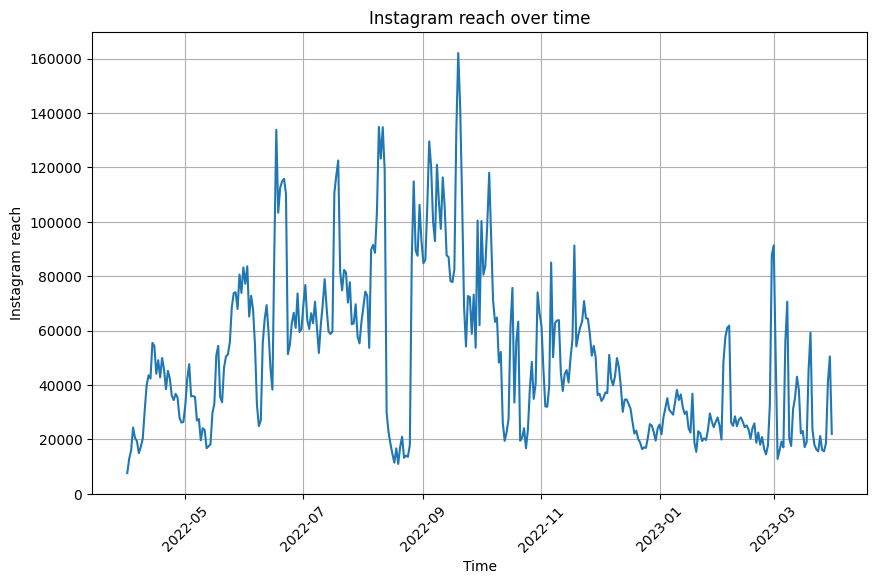

In [10]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Instagram reach'])
plt.title('Instagram reach over time')
plt.xlabel('Time')
plt.ylabel('Instagram reach')
plt.grid(True)   # to show grid lines
plt.xticks(rotation=45)   # to rotate x-axis labels for better readability
plt.show()

##### We'll use a bar chart to analyze the trend of instagram for each day

Text(0, 0.5, 'Instagram reach')

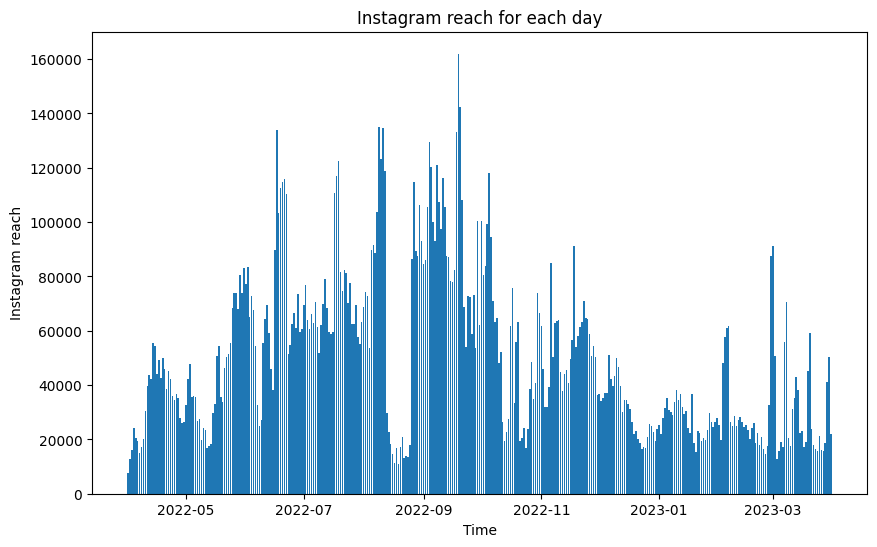

In [11]:
plt.figure(figsize=(10,6))
plt.bar(df['Date'], df['Instagram reach'])
plt.title('Instagram reach for each day')
plt.xlabel('Time')
plt.ylabel('Instagram reach')

##### We'll check the distribution of the data now using box plot

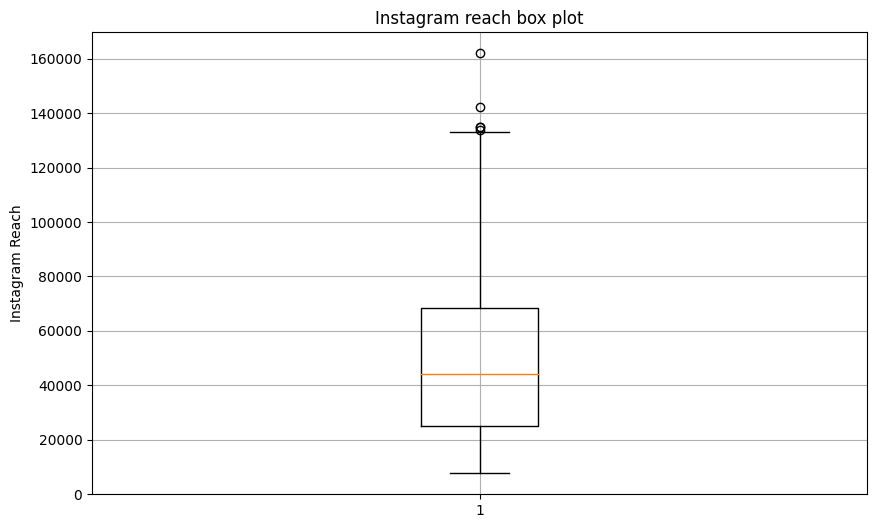

In [12]:
plt.figure(figsize=(10,6))
plt.boxplot(df['Instagram reach'])
plt.ylabel('Instagram Reach')
plt.title('Instagram reach box plot')
plt.grid()
plt.show()

#### We need to analyze the reach based on the days of the week. 
##### First, we need to create a new feature that contains the name of each day.
##### We will extract the name of each day using dt.day_name() method

In [13]:
df['Day'] = df['Date'].dt.day_name()
df.head()

,Date,Instagram reach,Day
0,2022-04-01,7620,Friday
1,2022-04-02,12859,Saturday
2,2022-04-03,16008,Sunday
3,2022-04-04,24349,Monday
4,2022-04-05,20532,Tuesday


###### let's preview some statistics about each day of the week by grouping the dataframe by the day column

In [14]:
day_stats = df.groupby('Day')['Instagram reach'].agg(['mean','median','std']).reset_index()
day_stats

,Day,mean,median,std
0,Friday,46666.849057,35574.0,29856.943036
1,Monday,52621.692308,46853.0,32296.071347
2,Saturday,47374.750000,40012.0,27667.043634
3,Sunday,53114.173077,47797.0,30906.162384
4,Thursday,48570.923077,39150.0,28623.220625
5,Tuesday,54030.557692,48786.0,32503.726482
6,Wednesday,51017.269231,42320.5,29047.869685


###### we can now visualize the reach for each day of the week with a bar chart

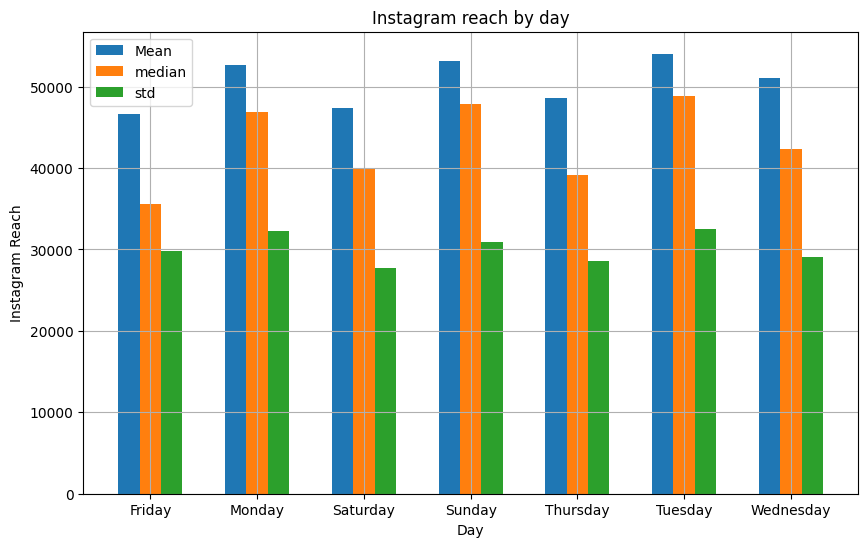

In [15]:
plt.figure(figsize=(10,6))
bar_width = 0.2
index = range(len(day_stats['Day']))
plt.bar(day_stats['Day'],day_stats['mean'],bar_width, label='Mean')
plt.bar([i+bar_width for i in index], day_stats['median'],bar_width,label='median')
plt.bar([i+2*bar_width for i in index], day_stats['std'],bar_width,label='std')

plt.xlabel('Day')
plt.ylabel('Instagram Reach')
plt.title('Instagram reach by day')
plt.xticks([i+bar_width for i in index])
plt.legend()
plt.grid()

plt.show()

##### We'll now use time series forcasting for forcast reach.
###### Let's start with exploring trends and seasonal patterns.

<Axes: >

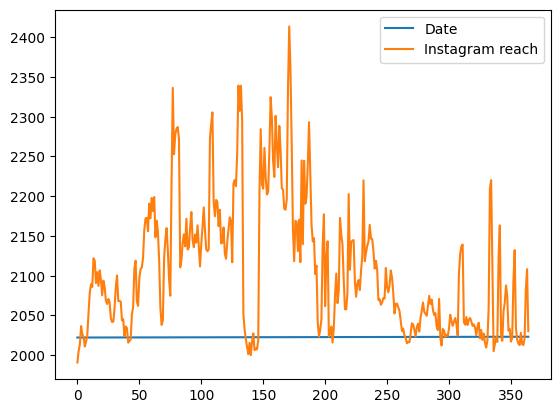

In [16]:
df.plot()


C:\Users\nozm\AppData\Local\Temp\ipykernel_5932\3107048393.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

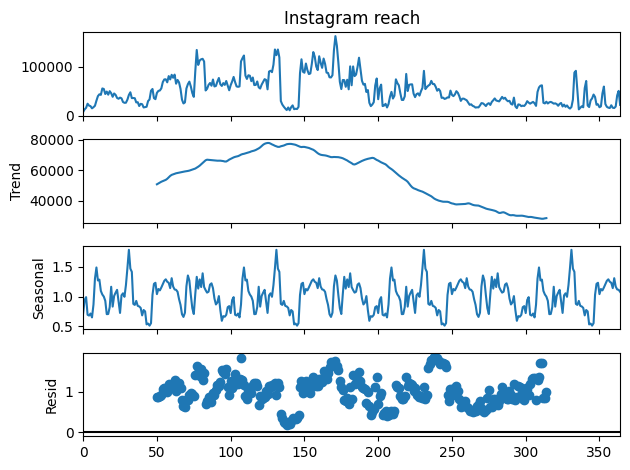

In [17]:
result = seasonal_decompose(df['Instagram reach'], model='multiplicative', period=100)
fig = plt.figure()
fig = result.plot()
fig.show()

##### The reach is affected by seasonality, so the best model will be SARIMA to forecast the reach of the instagram account
###### We'll need to find the values of p, d, ,and q.

###### here is the visualization of the autocorrelation from which we'll find the value of p

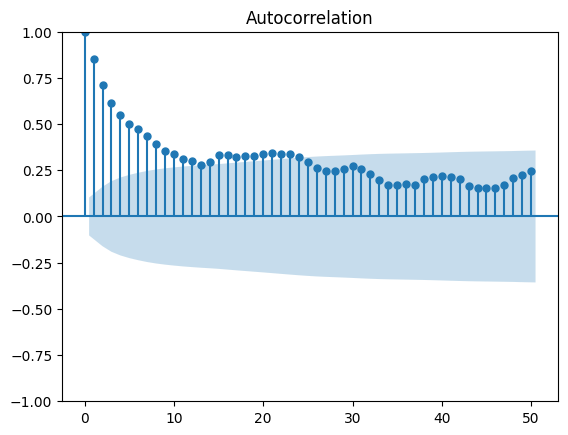

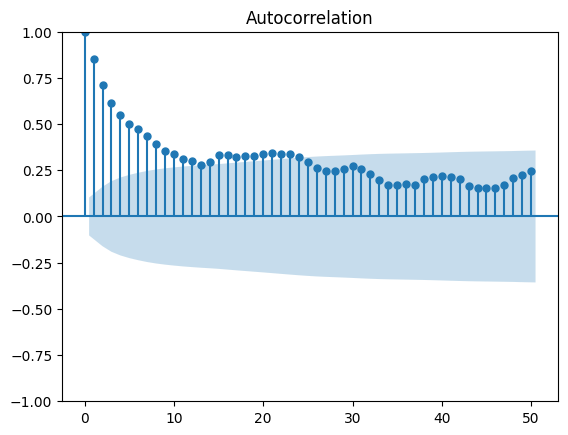

In [18]:
plot_acf(df['Instagram reach'], lags = 50)

##### p = 8

###### here is the visualization of the partial autocorrelation from which we'll find the value of q

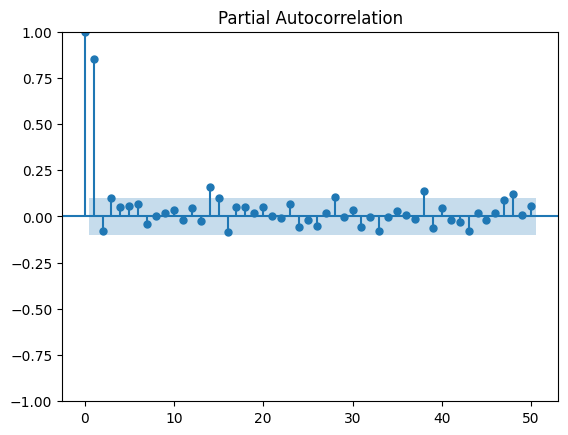

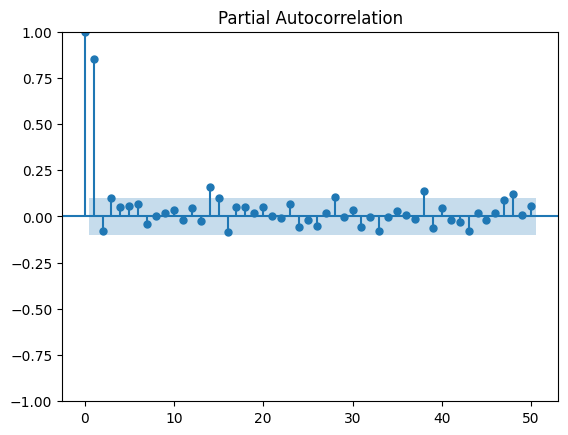

In [19]:
plot_pacf(df['Instagram reach'], lags=50)

##### q = 2

###### d = 1 since the reach is affected by seasonality 

##### let's start training SARIMA model

In [21]:
p, d, q = 8, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Instagram reach'],
                                 order=(p, d, q),
                                 seasonal_order=(p, d, q, 10))

model = model.fit()
print(model.summary)

c:\users\nozm\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x000000001C978E80>>


<function matplotlib.pyplot.show(close=None, block=None)>

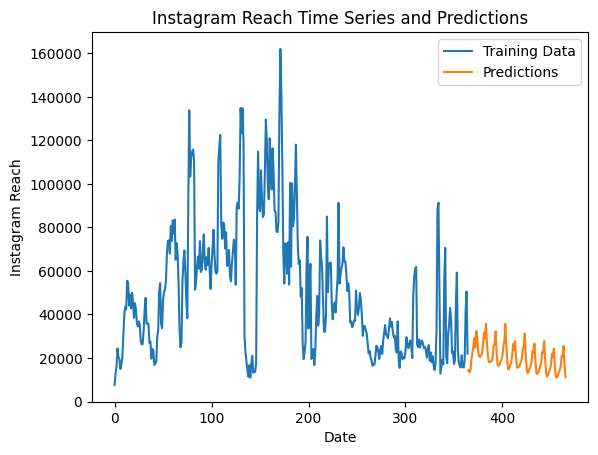

In [23]:
predictions = model.predict(len(df),len(df)+100)

#plot Training Data
plt.plot(df.index, df['Instagram reach'], label="Training Data")

#plot Predicted Data
plt.plot(predictions.index, predictions, label="Predictions")

plt.title("Instagram Reach Time Series and Predictions")
plt.xlabel("Date")
plt.ylabel("Instagram Reach")
plt.legend()
plt.show



##### In conclusion, The figure above shows the predicted reach, which means this is the number of people the an Instagram post, story, or any other content will reach.